**Бизнес-постановка задачи**

Оценка стоимости поддержанного автомобиля по известным параметрам. Ценообразование нетривиальная задача для обеих сторон процесса купли-продажи. Продавцу выгодно продать автомобиль по рыночной цене или даже чуть выше, а покупателю наоборот — купить дешевле. Решенная задача будет иметь большую актуальность для покупателя, имея под собой математический аппарат, поможет прозрачнее вести сделки и не быть обманутым недобросовестными автовладельцами.


**Постановка ML-задачи**

Линейная регрессия

**Набор данных**

* Price — цена, в долларах США (**отклик**)
* Year — год производства
* Condition — состояние
* cylinders — количество цилиндров
* odometer — пробег
* title_status — легальный статус авто, т.е. все документы в наличии
* transmission — коробка передач
* drive — привод
* size — полноразмерность авто
* lat — широта
* long — долгота
* weather — среднегодовая температура в городе продажи, в Градусах Фаренгейта


**Метрики для измерения качества**

* MAE — cредняя абсолютная ошибка представляет собой среднее значение абсолютной разницы между фактическими и прогнозируемыми значениями в наборе данных. Измеряет среднее значение остатков в наборе данных.
* RMSE — квадратный корень среднеквадратической ошибки представляет собой среднее значение квадратичной разницы между исходными и прогнозируемыми значениями в наборе данных. Измеряет стандартное отклонение остатков.
* R2 — Коэффициент детерминации или R-квадрат представляет собой долю дисперсии зависимой переменной.

Меньшее значение MAE, RMSE подразумевает более высокую точность регрессионной модели. Однако более высокое значение R квадрата считается желательным.

In [77]:
 # загружаем библиотеки и для простоты обращения в коде сокращаем
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_excel('data_ford.xlsx', usecols=lambda x: 'Unnamed' not in x)

In [79]:
df.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [80]:
df.shape

(7017, 12)

Таблица имеет 7017 строк и 12 столбцов, иначе говоря объекты и признаки

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


Метод info() также указывает на 7017 объектов и 12 признаков

Присутствует 3 типа данных:


* object - не число, 4 столбца
* float64 - число с плавающей точкой, 3 столбца
* int64 - целое число, 5 столбцов



In [82]:
df = df.dropna()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5202 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5202 non-null   int64  
 1   year          5202 non-null   int64  
 2   condition     5202 non-null   int64  
 3   cylinders     5202 non-null   int64  
 4   odometer      5202 non-null   int64  
 5   title_status  5202 non-null   object 
 6   transmission  5202 non-null   object 
 7   drive         5202 non-null   object 
 8   size          5202 non-null   object 
 9   lat           5202 non-null   float64
 10  long          5202 non-null   float64
 11  weather       5202 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 528.3+ KB


У 1815 (26%) объектов присутствовала хотя бы один пропуск, для удобства работы мы отчистили данные из нашего датасета, убрав объекты со значениями NaN

In [84]:
df.describe()

,price,year,condition,cylinders,odometer,lat,long,weather
count,5202.000000,5202.000000,5202.000000,5202.000000,5.202000e+03,5202.000000,5202.000000,5202.000000
mean,15388.826797,2008.198577,2.580930,7.376778,1.173255e+05,39.288263,-90.345207,52.149942
std,10820.253885,6.676873,0.677378,0.943869,8.443138e+04,5.345894,12.914642,7.727490
min,1.000000,1965.000000,0.000000,3.000000,0.000000e+00,25.739200,-151.055832,29.000000
25%,6800.000000,2005.000000,2.000000,6.000000,7.121100e+04,35.661076,-94.366510,45.000000
50%,13880.000000,2010.000000,3.000000,8.000000,1.151170e+05,40.078600,-88.063080,51.000000
75%,21995.000000,2013.000000,3.000000,8.000000,1.530450e+05,43.204762,-82.378235,59.000000
max,74374.000000,2018.000000,5.000000,10.000000,2.490000e+06,64.837800,-68.412100,71.000000


Метод описывает базовые статистики для набора данных. Отображает перцентили параметров, минимальное и максимальное значения, среднее и стандартное отклонение.

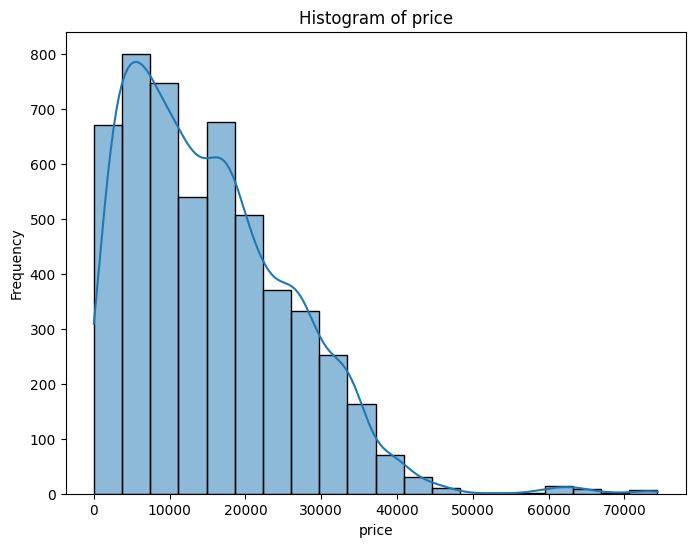

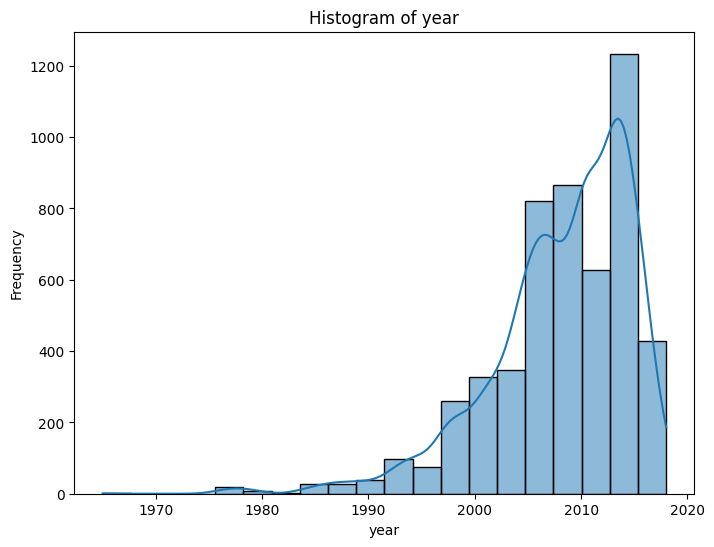

In [85]:
# Гистограммы для цены и года
numeric_features = ['price', 'year']

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=df[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

Text(0.5, 1.0, 'Correlation Matrix')

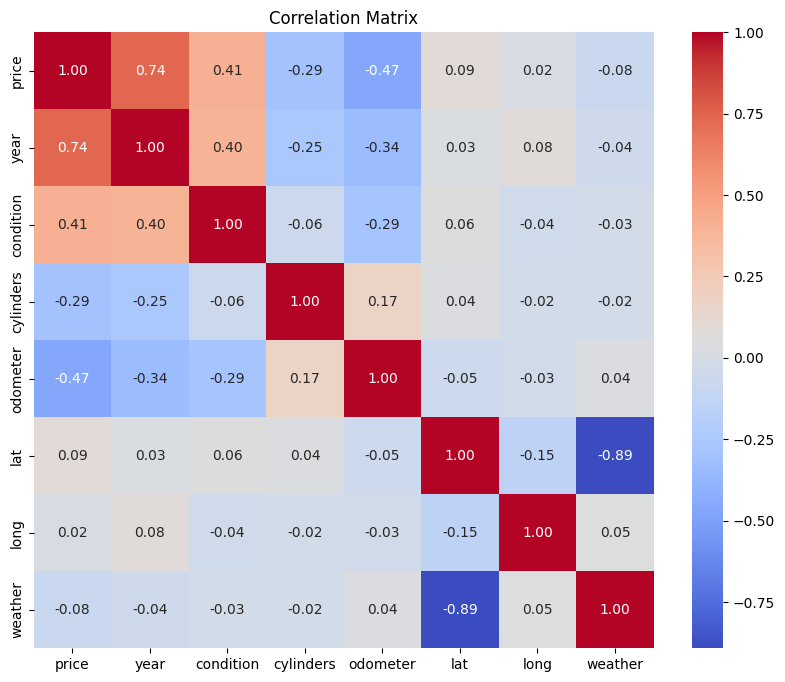

In [86]:
# Визуализация корреляционной матрицы числовых признаков
num_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

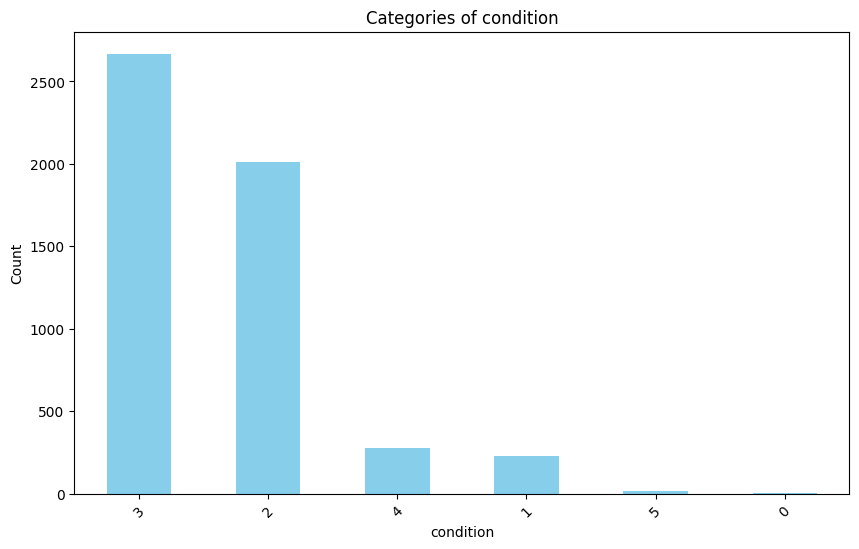

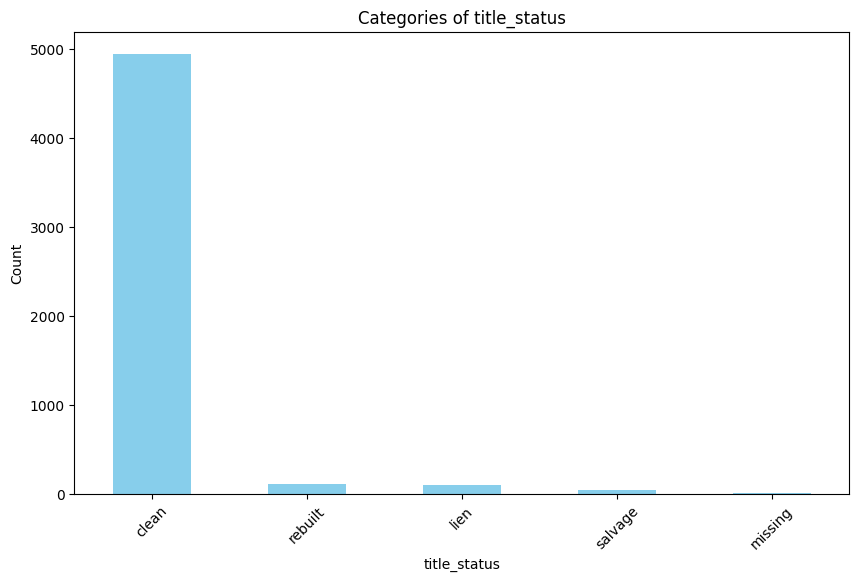

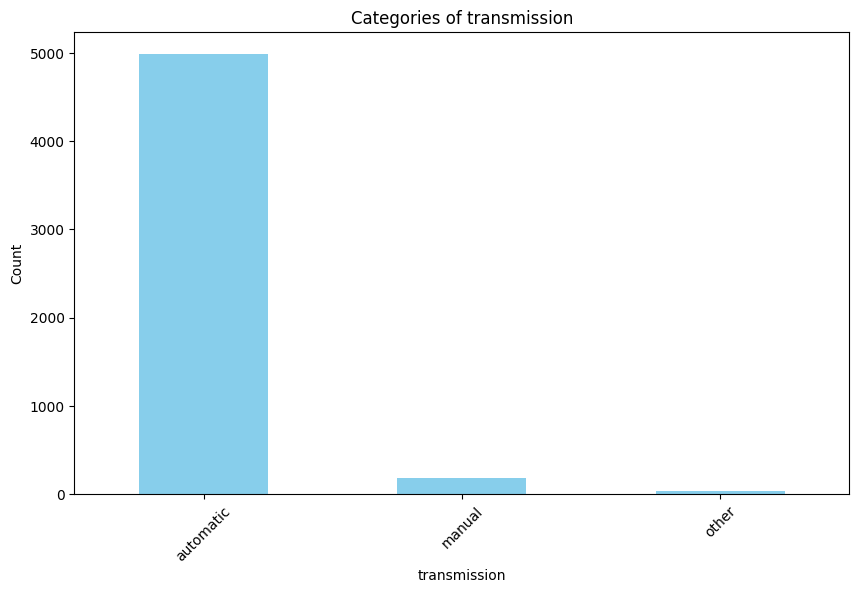

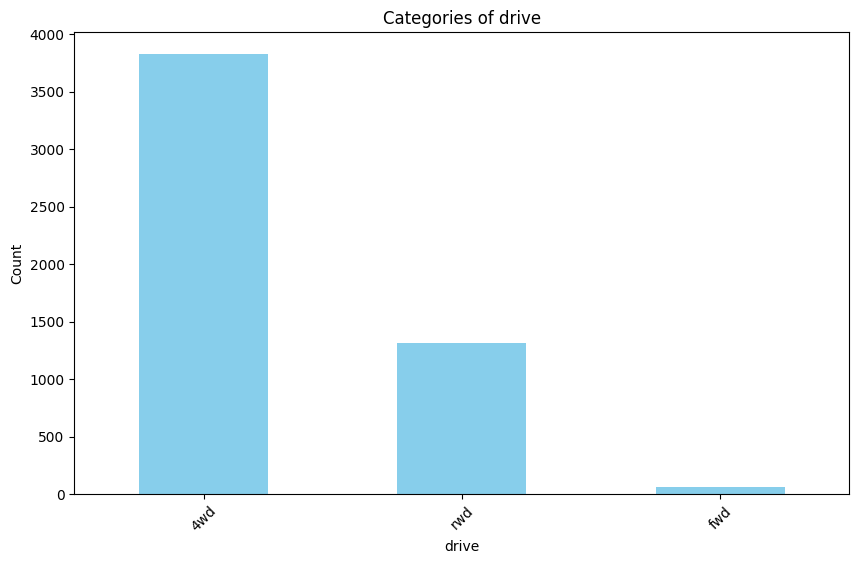

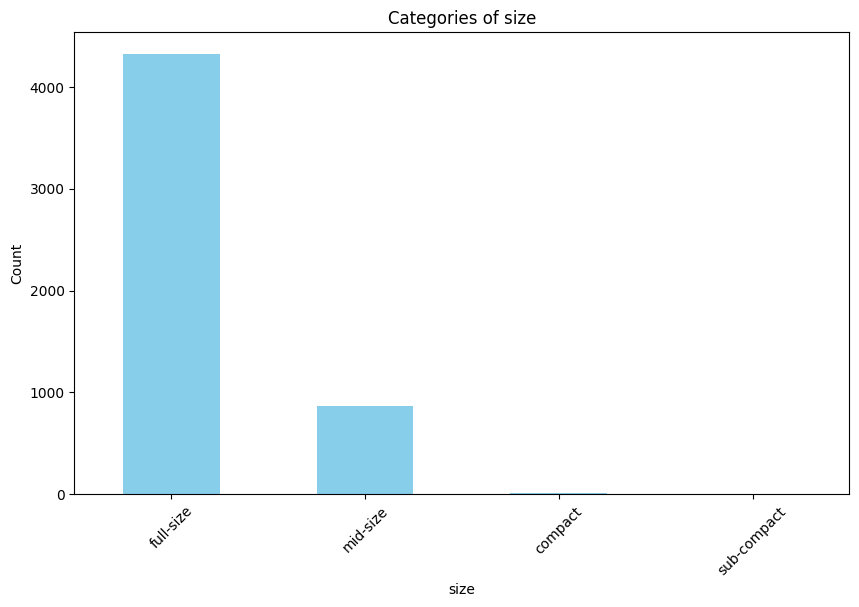

In [87]:
#Столбчатые диаграммы для категориальных признаков
categorical_features = ['condition', 'title_status', 'transmission', 'drive', 'size']

for feature in categorical_features:
    top_categories = df[feature].value_counts()
    plt.figure(figsize=(10, 6))
    top_categories.plot(kind='bar', color='skyblue')
    plt.title(f'Categories of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

Приведя несколько визуализаций можно сделать некоторые выводы:

1. Большинство автомобилей по своей стоимости меньше 14 000 тыс. долларов США, это также видно по 50% перцентилю при вызове метода describe()
2. Корреляционный анализ показывает сильную прямую линейную зависимость между годом выпуска и ценой. Иначе говоря, чем новее автомобиль, тем больше его цена. Состояние и цена менее зависимы, коэффицент корреляции 0,41.
3. Последние графики визуализируют категориальные признаки. Можно проследить соотношений состояний, статусов, коробок передач, приводов и полноразмерности в датасете.

В следующем разделе с построением модели и разбиением выборки на тестовую и тренировочную, предварительно применим One Hot Encoding для категориальных признаков.

В данных находится два числовых категориальных признака: cylinders и condition

И еще четыре текстовых категориальных признака: title_status, transmission, drive, size.

Преобразуем последние применив One Hot Encoding

In [88]:
# импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [89]:
df = pd.concat([df,  pd.get_dummies(df['title_status'], prefix="title_status", drop_first=True),
                            pd.get_dummies(df['transmission'], prefix="transmission", drop_first=True),
                            pd.get_dummies(df['drive'], prefix="drive", drop_first=True),
                            pd.get_dummies(df['size'], prefix="size", drop_first=True)],  axis=1)

In [90]:
df.drop(['title_status', 'transmission', 'drive', 'size'], axis=1, inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5202 entries, 0 to 7016
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 5202 non-null   int64  
 1   year                  5202 non-null   int64  
 2   condition             5202 non-null   int64  
 3   cylinders             5202 non-null   int64  
 4   odometer              5202 non-null   int64  
 5   lat                   5202 non-null   float64
 6   long                  5202 non-null   float64
 7   weather               5202 non-null   float64
 8   title_status_lien     5202 non-null   bool   
 9   title_status_missing  5202 non-null   bool   
 10  title_status_rebuilt  5202 non-null   bool   
 11  title_status_salvage  5202 non-null   bool   
 12  transmission_manual   5202 non-null   bool   
 13  transmission_other    5202 non-null   bool   
 14  drive_fwd             5202 non-null   bool   
 15  drive_rwd             5202

Применили One Hot Encoding, убрали лишние параметры и использовали drop_first=True -- все ради избежания некорректной работы модели.

Далее разобьем данные на тренировочную и тестовую выборки, обучим модель, предскажем цены на тестовой, оценим качество и создадим визуализацию.

In [92]:
# Разбиваем данные на признаки (X) и целевую переменную (y)
X = df.drop('price', axis=1)
y = df['price']

# Разбиваем данные на тренировочную и тестовую выборки в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказываем цены на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем качество модели с помощью метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Выводим результаты
print("Средняя абсолютная ошибка (MAE):", mae)
print("Квадратный корень из среднеквадратической ошибки (RMSE):", rmse)
print("Коэффициент детерминации (R^2):", r2)

Средняя абсолютная ошибка (MAE): 4223.387133911215
Квадратный корень из среднеквадратической ошибки (RMSE): 5770.530462921421
Коэффициент детерминации (R^2): 0.6925970819272504


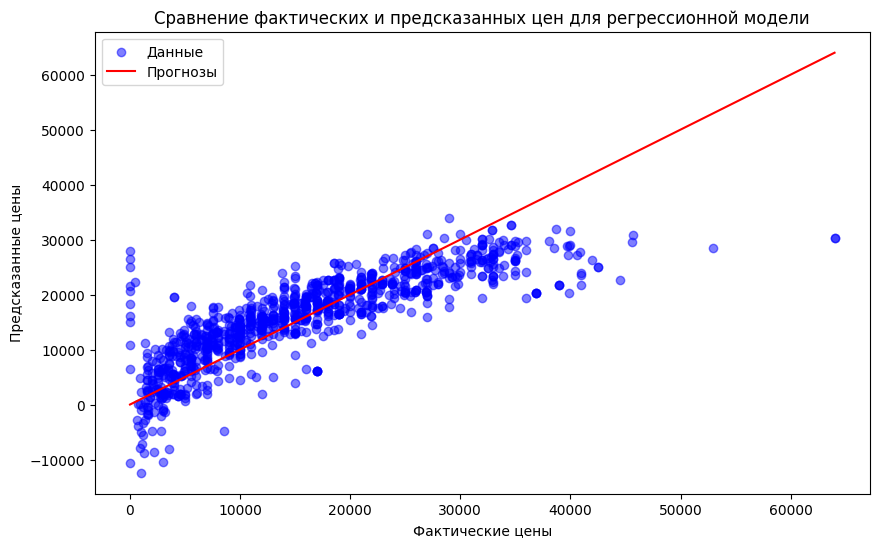

In [93]:
# Создаем визуализацию
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Фактические цены')
plt.ylabel('Предсказанные цены')
plt.title('Сравнение фактических и предсказанных цен для регрессионной модели')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.legend(['Данные', 'Прогнозы'], loc='upper left')
plt.show()


Качество модели линейной регрессии показывает не самую высокую точность и часто ошибается в предсказаниях.

Было принято решение применить модель случайного леса для сравнения обеих и выбора лучшей.

In [94]:
%%capture
!pip install optuna

In [95]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import optuna

* n_estimators: Количество деревьев в случайном лесу. Увеличение этого параметра, как правило, повышает качество модели, но также увеличивает вычислительные затраты.
* max_depth: Максимальная глубина деревьев в случайном лесу. Этот параметр контролирует сложность модели и влияет на ее способность улавливать нелинейные зависимости.
* min_samples_split: Минимальное количество выборок, необходимое для разбиения внутреннего узла. Этот параметр влияет на склонность модели к переобучению.
* min_samples_leaf: Минимальное количество выборок, необходимое для создания листового узла. Этот параметр также влияет на склонность модели к переобучению.

Выбор этих гиперпараметров обусловлен тем, что они являются ключевыми для настройки модели случайного леса и оказывают значительное влияние на ее производительность.

In [96]:
%%time

# Подбор гиперпараметров с использованием scikit-learn
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Создаем модель случайного леса
rf_model = RandomForestRegressor(random_state=40)

# Используем 5-кратную кросс-валидацию, метрику neg_mean_absolute_error, 15 итераций случайного поиска, фиксированный random_state и все доступные ядра процессора
random_search = RandomizedSearchCV(rf_model, param_dist, cv=5, scoring='neg_mean_absolute_error', n_iter=15, verbose=2, random_state=40, n_jobs=-1)

# Запускаем процесс оптимизации гиперпараметров на тренировочных данных
random_search.fit(X_train, y_train)

# Получаем лучшие найденные значения гиперпараметров
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}
CPU times: user 2.82 s, sys: 233 ms, total: 3.06 s
Wall time: 2min 13s


In [97]:
%%time

# Подбор гиперпараметров с использованием Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

# Создаем модель с предложенными гиперпараметрами, обучаем модель на тренировочных данных, вычисляем метрику качества и возвращаем
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  random_state=40)
    model.fit(X_train, y_train)
    score = -mean_absolute_error(y_test, model.predict(X_test))
    return score

# Создаем переменную, указывая, что нужно максимизировать метрику
study = optuna.create_study(direction='maximize')

# Запускаем оптимизацию гиперпараметров с помощью Optuna, выполняя 15 итераций и используя все доступные ядра
study.optimize(objective, n_trials=15, n_jobs=-1)

# Получаем лучшие найденные значения гиперпараметров
best_params = study.best_params
print(f"Best parameters: {best_params}")

[I 2024-04-24 16:27:52,581] A new study created in memory with name: no-name-de5f34a1-9fa5-4004-a846-2a77e3ce471f
[I 2024-04-24 16:27:54,788] Trial 0 finished with value: -2165.2593977490515 and parameters: {'n_estimators': 110, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: -2165.2593977490515.
[I 2024-04-24 16:27:57,202] Trial 1 finished with value: -2100.0073950039086 and parameters: {'n_estimators': 226, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: -2100.0073950039086.
[I 2024-04-24 16:27:58,259] Trial 2 finished with value: -2619.673090479651 and parameters: {'n_estimators': 195, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 1 with value: -2100.0073950039086.
[I 2024-04-24 16:28:02,057] Trial 4 finished with value: -2650.9510192818884 and parameters: {'n_estimators': 102, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 1 with 

Best parameters: {'n_estimators': 235, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 1}
CPU times: user 40.1 s, sys: 176 ms, total: 40.3 s
Wall time: 45.3 s


In [98]:
# Обучение модели с лучшими гиперпараметрами
final_model = RandomForestRegressor(**best_params, n_jobs=-1, random_state=40)
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, min_samples_split=8, n_estimators=235,
                      n_jobs=-1, random_state=40)

In [99]:
#Оценка качества на отложенной выборке:
y_pred = final_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 1917.41
RMSE: 3584.18
R2: 0.88


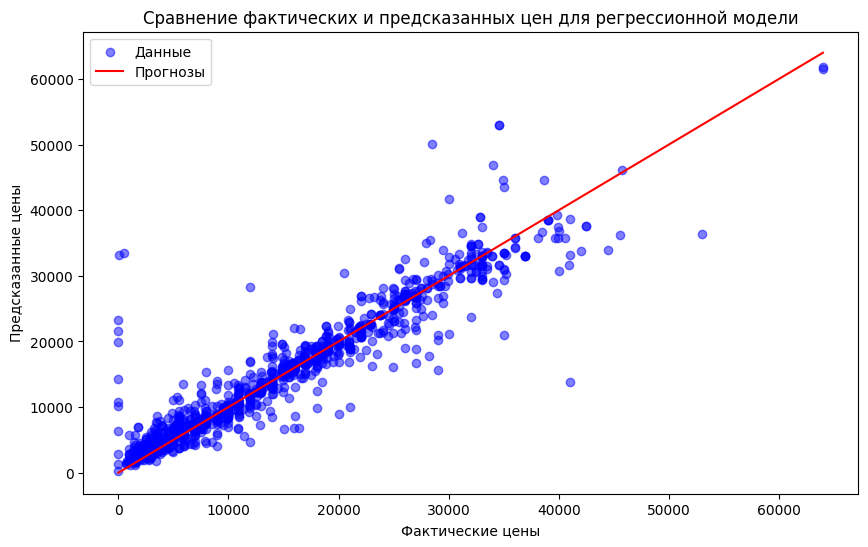

In [100]:
# Создаем визуализацию
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Фактические цены')
plt.ylabel('Предсказанные цены')
plt.title('Сравнение фактических и предсказанных цен для регрессионной модели')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.legend(['Данные', 'Прогнозы'], loc='upper left')
plt.show()


Данные показали, что модель линейной регрессии демонстрирует менее удовлетворительные результаты по сравнению с моделью случайного леса как визуально, так и с точки зрения метрик.

Чтобы оценить степень удовлетворительности полученных результатов, важно принять во внимание исходный порядок цен на автомобили. Средняя цена на которые составляет около 15 000 долларов. Это означает, что полученные значения ошибок могут быть приемлемыми.

In [101]:
# Выводим показатели важности признаков
coef_df = pd.DataFrame(final_model.feature_importances_, X_test.columns, columns=['Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

                      Coefficient
year                     0.739437
odometer                 0.117100
lat                      0.041474
drive_rwd                0.025100
long                     0.024956
cylinders                0.018029
weather                  0.010831
condition                0.008660
title_status_salvage     0.003336
title_status_rebuilt     0.003050
transmission_other       0.002835
size_mid-size            0.001797
size_full-size           0.001777
title_status_lien        0.001024
drive_fwd                0.000381
transmission_manual      0.000182
size_sub-compact         0.000015
title_status_missing     0.000014


Представленные результаты демонстрируют реалистичную картину ценообразования на автомобильном рынке. Ключевыми факторами, определяющими цену автомобиля, действительно являются год его выпуска ("year") и пробег ("odometer").


Вывод: Построенная модель случайного леса с подобранными гиперпараметрами показывает хорошие результаты и может быть использована для оценки стоимости подержанных автомобилей, всё же без участия человека еще не обойтись.